In [1]:
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio

import scipy.io.wavfile as wavfile
import soundfile as sf

2024-04-03 10:30:10.005009: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 10:30:10.334635: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-03 10:30:10.334673: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-03 10:30:11.846108: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

In [2]:
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

2024-04-03 10:30:22.131309: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-03 10:30:22.131357: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-03 10:30:22.131399: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (saji-HP-Laptop-15s-eq0xxx): /proc/driver/nvidia/version does not exist
2024-04-03 10:30:22.132002: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# testing_wav_file_name = '/home/saji/DSprojects/CloneVoiceDetection/data/reduced_LA/flac/LA_E_6866159.flac'
# print(testing_wav_file_name)

In [3]:
# Utility functions for loading audio files and making sure the sample rate is correct.

@tf.function
def load_flac_16k_mono(filename,sample_rate=16000):
    """ Load a FLAC file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    with tf.device('/CPU:0'):
      file_contents = tf.io.read_file(filename)
      audio = tfio.audio.decode_flac(file_contents,dtype=tf.int16)
      audio = tf.squeeze(audio, axis=-1)
      audio = tf.cast(audio, dtype=tf.float32)
      audio = tfio.audio.resample(audio, rate_in=sample_rate, rate_out=16000)
      
    return audio

In [7]:
# testing_wav_data = load_wav_16k_mono(testing_wav_file_name)

# _ = plt.plot(testing_wav_data)

# # Play the audio file.
# display.Audio(testing_wav_data, rate=16000)

In [8]:
# testing_wav_data

In [4]:
class_map_path = yamnet_model.class_map_path().numpy().decode('utf-8')
class_names =list(pd.read_csv(class_map_path)['display_name'])

for name in class_names[:20]:
  print(name)
print('...')

Speech
Child speech, kid speaking
Conversation
Narration, monologue
Babbling
Speech synthesizer
Shout
Bellow
Whoop
Yell
Children shouting
Screaming
Whispering
Laughter
Baby laughter
Giggle
Snicker
Belly laugh
Chuckle, chortle
Crying, sobbing
...


In [10]:
# scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
# class_scores = tf.reduce_mean(scores, axis=0)
# top_class = tf.math.argmax(class_scores)
# inferred_class = class_names[top_class]

# print(f'The main sound is: {inferred_class}')
# print(f'The embeddings shape: {embeddings.shape}')

In [5]:
audio_dir = '/kaggle/input/asvspoof-la-reduced/reduced_LA/flac/'

In [ ]:

metadata = pd.read_csv('/kaggle/input/asvspoof-la-reduced/reduced_LA/modified_1500.csv')

In [10]:
metadata.head()

,speaker_ID,audio_ID,codec,transmission_geo,spoof_type,target,trim_status,subset,gender
0,LA_0009,LA_E_9332881,alaw,ita_tx,A07,spoof,notrim,eval,female
1,LA_0009,LA_E_6866159,alaw,ita_tx,A07,spoof,notrim,eval,female
2,LA_0009,LA_E_4759417,alaw,sin_tx,A07,spoof,notrim,eval,female
3,LA_0009,LA_E_2667748,alaw,loc_tx,A07,spoof,notrim,eval,female
4,LA_0009,LA_E_8589971,alaw,loc_tx,A07,spoof,notrim,progress,female


In [11]:
my_classes = ['bonafide', 'spoof']
map_class_to_id = {'bonafide': 0, 'spoof': 1}
map_spoof_type_to_id = {'A07':1, 'A08':2, 'A09':3, 'A10':4, 'A11':5, 'A12':6,'A13':7,'A14':8,'A15':9,'A16':10,'A17':11,'A18':12,'A19':13,'bonafide':14
                        }
class_id = metadata['target'].apply(lambda name: map_class_to_id[name])
metadata['target_val'] = class_id

spoof_id = metadata['spoof_type'].apply(lambda name: map_spoof_type_to_id[name])
metadata['spoof_val'] = spoof_id

full_path = metadata['audio_ID'].apply(lambda row: os.path.join(audio_dir,row+'.flac'))
metadata['audio_path'] = full_path

metadata.head()

,speaker_ID,audio_ID,codec,transmission_geo,spoof_type,target,trim_status,subset,gender,target_val,spoof_val,audio_path
0,LA_0009,LA_E_9332881,alaw,ita_tx,A07,spoof,notrim,eval,female,1,1,/kaggle/input/asvspoof-la-reduced/reduced_LA/f...
1,LA_0009,LA_E_6866159,alaw,ita_tx,A07,spoof,notrim,eval,female,1,1,/kaggle/input/asvspoof-la-reduced/reduced_LA/f...
2,LA_0009,LA_E_4759417,alaw,sin_tx,A07,spoof,notrim,eval,female,1,1,/kaggle/input/asvspoof-la-reduced/reduced_LA/f...
3,LA_0009,LA_E_2667748,alaw,loc_tx,A07,spoof,notrim,eval,female,1,1,/kaggle/input/asvspoof-la-reduced/reduced_LA/f...
4,LA_0009,LA_E_8589971,alaw,loc_tx,A07,spoof,notrim,progress,female,1,1,/kaggle/input/asvspoof-la-reduced/reduced_LA/f...


In [12]:
metadata = metadata[['audio_path','target_val','spoof_val']]

In [13]:
metadata.head()

,audio_path,target_val,spoof_val
0,/kaggle/input/asvspoof-la-reduced/reduced_LA/f...,1,1
1,/kaggle/input/asvspoof-la-reduced/reduced_LA/f...,1,1
2,/kaggle/input/asvspoof-la-reduced/reduced_LA/f...,1,1
3,/kaggle/input/asvspoof-la-reduced/reduced_LA/f...,1,1
4,/kaggle/input/asvspoof-la-reduced/reduced_LA/f...,1,1


In [14]:
filenames = metadata['audio_path']
targets = metadata['target_val']
spoof_type = metadata['spoof_val']

main_ds = tf.data.Dataset.from_tensor_slices((filenames, targets,spoof_type,filenames))
main_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [15]:
def load_aud_for_map(filename, label, spoof_type, filenames):
  return load_flac_16k_mono(filename), label, spoof_type, filenames

main_ds = main_ds.map(load_aud_for_map)
main_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [16]:
# applies the embedding extraction model to data
def extract_embedding(aud_data, label, spoof_type, filename):
  ''' run YAMNet to extract embedding from the audio data '''
  scores, embeddings, spectrogram = yamnet_model(aud_data)
  num_embeddings = tf.shape(embeddings)[0]
  return (embeddings,
            tf.repeat(label, num_embeddings),
            tf.repeat(spoof_type, num_embeddings),
            tf.repeat(filename, num_embeddings))
  
main_ds = main_ds.map(extract_embedding).unbatch()
main_ds.element_spec

(TensorSpec(shape=(1024,), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

SPLIT THE DATA

In [18]:
from sklearn.model_selection import train_test_split

#create a stratification label
stratify_labels = tf.stack([targets, spoof_type], axis=1)

strat_train_indices, strat_remaining_indices = train_test_split(
    np.arange(len(filenames)), test_size=0.4, random_state=42, stratify=stratify_labels)

strat_val_indices, strat_test_indices = train_test_split(
    strat_remaining_indices, test_size=0.5, random_state=42)

train_indices = strat_train_indices
val_indices = strat_val_indices
test_indices = strat_test_indices

train_ds = main_ds.enumerate().filter(lambda i, _: tf.reduce_any(tf.equal(i, train_indices))).map(lambda i, data: data)
val_ds = main_ds.enumerate().filter(lambda i, _: tf.reduce_any(tf.equal(i, val_indices))).map(lambda i, data: data)
test_ds = main_ds.enumerate().filter(lambda i, _: tf.reduce_any(tf.equal(i, test_indices))).map(lambda i, data: data)

remove_columns = lambda embedding, label, spoof_type, filename: (embedding, label)

# Remove the spoof type and filename columns from each dataset
train_ds = train_ds.map(remove_columns)
val_ds = val_ds.map(remove_columns)
test_ds = test_ds.map(remove_columns)

# Cache, shuffle, batch, and prefetch the datasets
train_ds = train_ds.cache().shuffle(53261).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)



In [ ]:
# train_ds.element_spec

MODEL

In [19]:
my_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024,), dtype=tf.float32,
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(my_classes))
], name='my_model')

my_model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525,826 (2.01 MB)

 Trainable params: 525,826 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
tf.__version__

'2.15.0'

In [20]:
my_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = [
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
]

In [25]:
history = my_model.fit(train_ds,
                       epochs=100,
                       batch_size =32,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/100
   1659/Unknown 2414s 8ms/step - accuracy: 0.8193 - loss: 0.7984

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1665/1665 ━━━━━━━━━━━━━━━━━━━━ 4837s 1s/step - accuracy: 0.8194 - loss: 0.7973 - val_accuracy: 0.8482 - val_loss: 0.4014
Epoch 2/100
1665/1665 ━━━━━━━━━━━━━━━━━━━━ 60s 9ms/step - accuracy: 0.8464 - loss: 0.4058 - val_accuracy: 0.8522 - val_loss: 0.3941
Epoch 3/100
1665/1665 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8468 - loss: 0.4019 - val_accuracy: 0.8529 - val_loss: 0.3885
Epoch 4/100
1665/1665 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8486 - loss: 0.3968 - val_accuracy: 0.8528 - val_loss: 0.3885
Epoch 5/100
1665/1665 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8506 - loss: 0.3922 - val_accuracy: 0.8530 - val_loss: 0.3826
Epoch 6/100
1665/1665 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8517 - loss: 0.3879 - val_accuracy: 0.8523 - val_loss: 0.3860
Epoch 7/100
1665/1665 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8559 - loss: 0.3819 - val_accuracy: 0.8545 - val_loss: 0.3896
Epoch 8/100
1665/1665 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8571 - loss: 0.37

In [26]:
loss, accuracy = my_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

555/555 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8541 - loss: 0.5418
Loss:  0.5868418216705322
Accuracy:  0.8399233818054199


In [28]:
from IPython.display import FileLink
my_model.save('/kaggle/working/crctsplit_initial_model100.h5')
os.chdir('/kaggle/working')
FileLink('crctsplit_initial_model100.h5')

/kaggle/working/crctsplit_initial_model100.h5

In [ ]:
# my_model = tf.keras.models.load_model('/kaggle/input/initial-model/initial_model100.h5')

In [30]:
predictions=my_model.predict(test_ds,verbose=1)

555/555 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [31]:
predictions.shape

(17754, 2)

In [32]:
y_true = np.concatenate([t.numpy() for _, t in test_ds])

In [33]:
np.unique(y_true)

array([0, 1])

In [34]:
np.count_nonzero(y_true == 1)

14918

In [24]:
y_true.size - np.count_nonzero(y_true)

2836

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [38]:
conf_matrix = confusion_matrix(y_true, predictions.argmax(axis=1))
conf_matrix

array([[  734,  2102],
       [  740, 14178]])

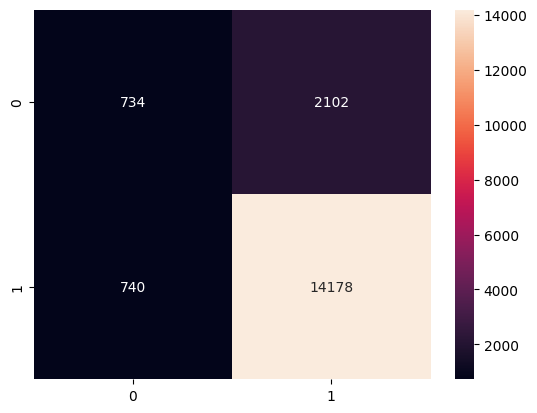

In [39]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()